# Coursera Capstone final Assignment: Clustering New York for opening organic grocery stores

## Content

* [Introduction](#intro)
* [Data](#data)
* [Methodology](#method)
* [Results](#res)
* [Discussion](#diss)
* [Conclusion](#conc)

## Introduction <a id="intro"></a>

In the previous labs we examined how the neighborhoods of cities could be segmented by the types of business locations 
in each neigborhood. In this project, I am interested to explore New York again. The aim of my project is to examine 
NY Boroughs for opening organic grocery stores.

### Business problem / Background

In the last years, the consumers' interest and market for organic products, stores and restaurants is continuously growing. 
For this Project I work for a organic grocery franchise. The franchises aim is to open new stores in metropole regions like New York. But of course, other retailers realized the potential of this market as well. So in New York, like in almost every city, the density of organic grocery stores is rising and the earnings are increasingly shared by many providers. The Business Problem is to find out which Borough of New York is best fitting for opening new organic based grocery stores.

To answer the question which areas show the best market potentials for opening this stores I consider the following variables:

* Population Data of the five Boroughs of New York
* Land area sizes of the five Boroughs of New York
* Average per Capita income of the five Boroughs of New York
* Number of existing organic based grocery stores in the five Boroughs of New York

Other variables, like rentals or leases were not taken into account to answer the question but will be discussed in the Discussion/Conclusion section.

## Data <a id="data"></a>

In the following lines I will provide information about the Data I use for my analyzes and from where I got these information. Also I will give an overview how the Data will be cleaned up and prepared to drive the analyzes.

In [2]:
#Import packages
import pandas as pd
import numpy as np
import json
#from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data 1: NY Population data

In this first step I gather population data of New York by the five Boroughs (Bronx, Brooklyn, Manhattan, Queens, Staten Island). 

The Dataset is downloaded from http://app.coredata.nyc as .csv and uploaded to github reposity.

This Dataframe includes Population Data from 2000 to 2018 for the five Boroughs of New York.

In [4]:
# get data for Population
# Downloaded file for NY Population by Boroughs from http://app.coredata.nyc and uploaded csv to github
url = 'https://raw.githubusercontent.com/gicnor/Coursera_Capstone/master/borough-population.csv'
df_pop = pd.read_csv(url)
df_pop.head()

,short_name,long_name,Borough,2000,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,pop_num,Population,Staten Island,443728,455344,477377,481613,487407,491730,469363,470467,470728,472621,473279,474558,476015,479458,476179
1,pop_num,Population,Manhattan,1529375,1529774,1611580,1620870,1634800,1629050,1586700,1601950,1619090,1626160,1636270,1644520,1643730,1664730,1628700
2,pop_num,Population,Bronx,1327690,1309640,1361470,1373660,1391900,1397290,1386660,1392000,1408470,1418730,1438160,1455440,1455720,1471160,1432130
3,pop_num,Population,Brooklyn,2465326,2446016,2508820,2528050,2556600,2567100,2508340,2532640,2565640,2592150,2621790,2636740,2629150,2648770,2582830
4,pop_num,Population,Queens,2242159,2215339,2255180,2270340,2293010,2306710,2233840,2247850,2272770,2296180,2321580,2339150,2333050,2358580,2278910


### Data 2: Borough area size

In this step, the NY area per Borough is being scraped from Wikipedia: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

For my analyzes only the column of sqaurekm is relevant.

In [5]:
# get data for Land area from Wikipedia
url = "https://en.wikipedia.org/wiki/Boroughs_of_New_York_City"
df_area = pd.read_html(url, header=2, decimal='.')[0]
df_area.head()

,Borough,County,Estimate (2018)[3],billions(US$)[4],per capita(US$),square miles,squarekm,persons / sq. mi,persons /km2
0,The Bronx,Bronx,1432132,42.695,29200,42.10,109.04,34653,13231
1,Brooklyn,Kings,2582830,91.559,34600,70.82,183.42,37137,14649
2,Manhattan,New York,1628701,600.244,360600,22.83,59.13,72033,27826
3,Queens,Queens,2278906,93.310,39600,108.53,281.09,21460,8354
4,Staten Island,Richmond,476179,14.514,30300,58.37,151.18,8112,3132


### Data 3: NY mean household income data

In this section data will be downloaded from https://www.census.gov and uploaded to github reposity.

The internet source includes many information about New York population, income, education and so on. For my purpose I will just read the rows with the average per capita income for the five Borough.

In [6]:
# get income data from https://www.census.gov
url = "https://raw.githubusercontent.com/gicnor/Coursera_Capstone/master/QuickFacts%20Feb-16-2020.csv"
df_inc_mean = pd.read_csv(url)
df_inc_mean.head()

,Fact,Fact Note,"New York County (Manhattan Borough), New York","Value Note for New York County (Manhattan Borough), New York","Bronx County (Bronx Borough), New York","Value Note for Bronx County (Bronx Borough), New York","Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York","Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York","Richmond County (Staten Island Borough), New York","Value Note for Richmond County (Staten Island Borough), New York","New York city, New York","Value Note for New York city, New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Population estimates, July 1, 2018, (V2018)",NaN,"1,628,701",NaN,"1,432,132",NaN,"2,278,906",NaN,"2,582,830",NaN,"476,179",NaN,"8,398,748",NaN
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...",NaN,"1,586,360",NaN,"1,384,603",NaN,"2,230,578",NaN,"2,504,717",NaN,"468,730",NaN,"8,174,988",NaN
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Choose relevant Data from DataFrame
df_cap_income = df_inc_mean.iloc[[48],[0, 2, 4, 6, 8, 10]]

# Rename columns
df_cap_income.rename(columns={"New York County (Manhattan Borough), New York":"Manhattan",
                             "Bronx County (Bronx Borough), New York": "Bronx",
                             "Queens County (Queens Borough), New York": "Queens",
                             "Kings County (Brooklyn Borough), New York": "Brooklyn",
                             "Richmond County (Staten Island Borough), New York": "Staten Island",
                             "Fact":"Borough"}, inplace=True)

# Drop "$" from values
df_cap_income['Manhattan'] = df_cap_income['Manhattan'].str.replace(r'\$', '')
df_cap_income['Bronx'] = df_cap_income['Bronx'].str.replace(r'\$', '')
df_cap_income['Queens'] = df_cap_income['Queens'].str.replace(r'\$', '')
df_cap_income['Brooklyn'] = df_cap_income['Brooklyn'].str.replace(r'\$', '')
df_cap_income['Staten Island'] = df_cap_income['Staten Island'].str.replace(r'\$', '')

# Drop "," from values
df_cap_income['Manhattan'] = df_cap_income['Manhattan'].str.replace(r'\,', '')
df_cap_income['Bronx'] = df_cap_income['Bronx'].str.replace(r'\,', '')
df_cap_income['Queens'] = df_cap_income['Queens'].str.replace(r'\,', '')
df_cap_income['Brooklyn'] = df_cap_income['Brooklyn'].str.replace(r'\,', '')
df_cap_income['Staten Island'] = df_cap_income['Staten Island'].str.replace(r'\,', '')

df_cap_income

,Borough,Manhattan,Bronx,Queens,Brooklyn,Staten Island
48,Per capita income in past 12 months (in 2018 d...,72832,20850,30289,31984,34987


### Data 4: Get venues per Borough from Foursquare

Here I will use Foursquare to get information about existing organic grocery stores in the Boroughs of New York. In the first step I gather information where the current stores are located. In a second step I will use the API the check how many other organic grocery stores are located within 500 meters to each of the stores.

#### Get organic Stores from Foursquare in each Borough

In [8]:
# Credentials
CLIENT_ID = 'EOMLONZWTQLDDO0F1XWZR0ZDXTD2TRP03SPOGXWJW4Y5XYNZ'
CLIENT_SECRET = 'JPSN4HLGS5CMRDJEXTTTBEYZLQM4WVO1A4QMH3CRYYNZZ4K1'
VERSION = '20200101'

In [9]:
# Get organic tagged grocery stores Data from Foursqaure

limit=200
categoryId="52f2ab2ebcbc57f1066b8b45" # for organic tagged grocery stores

def getNearbyVenues(names, near):
    
    venues_list=[]
    for name, near in zip(names, near):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            near,
            categoryId,
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            near, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                             'near',
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
# Create DataFrame with organic tagged grocery stores per Borough
NY_organic = getNearbyVenues(names=df_pop['Borough'],
                            near=df_pop['Borough']
                            )

Staten Island
Manhattan
Bronx
Brooklyn
Queens


In [11]:
NY_organic.head()

,Borough,near,Venue,Venue_Lat,Venue_Long,Venue Category
0,Staten Island,Staten Island,Whole Foods Market,40.631498,-74.304228,Grocery Store
1,Staten Island,Staten Island,Park Slope Food Coop,40.674759,-73.976794,Organic Grocery
2,Staten Island,Staten Island,Flatbush Food Coop,40.641196,-73.964675,Organic Grocery
3,Staten Island,Staten Island,Windsor Terrace Food Coop,40.648175,-73.972311,Organic Grocery
4,Staten Island,Staten Island,Dimes Deli,40.714592,-73.990817,Organic Grocery


In [12]:
# Define ID-variable
NY_organic["ID"] = NY_organic["Venue_Lat"].astype("str")+", "+NY_organic["Venue_Long"].astype("str")
NY_organic.head()

,Borough,near,Venue,Venue_Lat,Venue_Long,Venue Category,ID
0,Staten Island,Staten Island,Whole Foods Market,40.631498,-74.304228,Grocery Store,"40.63149784984362, -74.30422764207012"
1,Staten Island,Staten Island,Park Slope Food Coop,40.674759,-73.976794,Organic Grocery,"40.674759316149355, -73.97679448127747"
2,Staten Island,Staten Island,Flatbush Food Coop,40.641196,-73.964675,Organic Grocery,"40.641195603869555, -73.9646754529375"
3,Staten Island,Staten Island,Windsor Terrace Food Coop,40.648175,-73.972311,Organic Grocery,"40.648175, -73.972311"
4,Staten Island,Staten Island,Dimes Deli,40.714592,-73.990817,Organic Grocery,"40.71459195873029, -73.99081729031317"


#### Get the number of organic stores around 500 meters for each existing store

In [13]:
# Get stores nearby

limit=100
rad=500 #radius
categoryId="52f2ab2ebcbc57f1066b8b45" # for organic tagged grocery stores

def getNearbyVenues2(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            categoryId,
            rad, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues2 = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues2.columns = ['ID', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue', 
                  'Nearby_Lat', 
                  'Nearby_Long', 
                  'Venue Category']
    
    return(nearby_venues2)

In [14]:
# Create DataFrame with nearby 500m stores
NY_organic_near = getNearbyVenues2 (names=NY_organic['ID'],
                                    latitudes=NY_organic['Venue_Lat'],
                                    longitudes=NY_organic['Venue_Long']
                                   )

40.63149784984362, -74.30422764207012
40.674759316149355, -73.97679448127747
40.641195603869555, -73.9646754529375
40.648175, -73.972311
40.71459195873029, -73.99081729031317
40.67610148438513, -73.97178424263382
40.618206, -73.960417
40.74005477916467, -74.16991365014131
40.715579155420606, -74.01136823958119
40.68633674088106, -73.97846730744199
40.539920434275395, -74.36608766086388
40.7170552041893, -74.28654430825806
40.727163233177905, -73.9853185415268
40.64909203083852, -73.94924301932052
40.63796187989747, -74.0756767988205
40.732009055896384, -74.00657296964181
40.723792913183296, -73.99146099967388
40.66487493558445, -73.99328059965966
40.72880655741807, -73.98628403433696
40.75686356881963, -73.9937370791919
40.73504451480305, -73.99110084279937
40.71626934343042, -73.9597792074956
40.75979, -74.02488
40.678194994151234, -74.26854550388957
40.62992, -74.028291
40.745057497004666, -73.99554284770052
40.71583338158002, -73.95570533511494
40.75450746689136, -73.98429874954766


40.656077538470775, -74.00710870249338
40.674759316149355, -73.97679448127747
40.73710379690735, -73.95542997650914
40.67610148438513, -73.97178424263382
40.73380695718071, -73.95491561381318
40.71626934343042, -73.9597792074956
40.68633674088106, -73.97846730744199
40.641195603869555, -73.9646754529375
40.71583338158002, -73.95570533511494
40.64909203083852, -73.94924301932052
40.648175, -73.972311
40.618206, -73.960417
40.66487493558445, -73.99328059965966
40.69338, -73.991341
40.67448104350491, -74.01686632905893
40.688481, -73.985304
40.67712835140533, -73.972470238526
40.716547989595064, -73.94641710014035
40.68034473331551, -73.94928040872702
40.683349, -73.911088
40.686478, -73.923504
40.693374, -73.981342
40.683116, -73.922974
40.676529042708644, -73.94762620929325
40.653894, -73.949752
40.68172257957213, -73.95839673212772
40.62982805635658, -73.9617794752121
40.696137, -73.933637
40.708603, -73.958298
40.69234873871358, -73.94271852623373
40.6218247, -73.93607949999999
40.691

In [16]:
print("The shape of this DataFrame is:",NY_organic_near.shape)

The shape of this DataFrame is: (547, 7)


## Methodology <a id="method"></a>

In this section I will perform the following tasks:

* Organize and prepare gathered DataFrames to merge them into one DataFrame
* Merging
* Visualizing the Data
* K-Means Clustering

### Step 1: Organizing DataFrames

In this first step, the collected DataFrames are being organized in order to obtain only relevant data.

#### Population Data

In [172]:
# Create new DataFrame with relevant Data only
df_NY_Pop = df_pop[["Borough","2018"]]

# Rename column
df_NY_Pop.rename(columns={"2018":"Population_2018"}, inplace=True)

df_NY_Pop.head()

C:\Users\Matthias\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Borough,Population_2018
0,Staten Island,476179
1,Manhattan,1628700
2,Bronx,1432130
3,Brooklyn,2582830
4,Queens,2278910


#### Area-size Data

In [171]:
# Create new DataFrame with relevant Data only
df_NY_area = df_area[["Borough", "squarekm"]]

# Drop rows which contain aggregated data
df_NY_area.drop([5,6,7], inplace=True)

# Rename Borough to join DataFrames
df_NY_area['Borough'].replace({'The Bronx': 'Bronx'}, inplace=True)

# Convert area size to float for computation
df_NY_area['squarekm'] = df_NY_area['squarekm'].astype("float")

df_NY_area.head()

C:\Users\Matthias\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Borough,squarekm
0,Bronx,109.04
1,Brooklyn,183.42
2,Manhattan,59.13
3,Queens,281.09
4,Staten Island,151.18


#### Mean Household income

In [19]:
# Transpose data to prepare merging
df_pc_income = df_cap_income.transpose()

# Rename columns
df_pc_income.rename(columns={"Per capita income in past 12 months (in 2018 dollars), 2014-2018":
                             "Per capita income 2018"}, inplace=True)

# Reset index
df_pc_income.reset_index(inplace=True)

# Set first row as header and drop row in Dataframe
df_pc_income.columns = df_pc_income.iloc[0]
df_pc_income.drop([0], inplace=True)

# Rename header
df_pc_income.rename(columns={"Per capita income in past 12 months (in 2018 dollars), 2014-2018":
                            "Average Per Capita income 2018 per Borough"}, inplace=True)

# Set income to integer
df_pc_income["Average Per Capita income 2018 per Borough"] = df_pc_income["Average Per Capita income 2018 per Borough"].astype("int")

df_pc_income.head()

,Borough,Average Per Capita income 2018 per Borough
1,Manhattan,72832
2,Bronx,20850
3,Queens,30289
4,Brooklyn,31984
5,Staten Island,34987


#### Organic tagged grocery stores

In [20]:
# Group number of organic grocery stores for each Borough
NY_organ_grouped = NY_organic[["Borough","Venue"]].groupby(["Borough"]).count()

# Rename column
NY_organ_grouped.rename(columns={"Venue":"No_organic"}, inplace=True)

NY_organ_grouped

,No_organic
Borough,
Bronx,94
Brooklyn,52
Manhattan,64
Queens,13
Staten Island,96


In [21]:
# Group by ID to get number of stores around 500 meters
NY_organic_near_grouped = NY_organic_near[["ID", "Venue"]].groupby(["ID"]).count().sort_values(["Venue"], ascending=False)

# Rename column
NY_organic_near_grouped.rename(columns={"Venue":"no_venues_500"}, inplace=True)

NY_organic_near_grouped.head()

,no_venues_500
ID,
"40.77366428738554, -73.913918871018",16
"40.71626934343042, -73.9597792074956",12
"40.71583338158002, -73.95570533511494",12
"40.773799, -73.914041",12
"40.67610148438513, -73.97178424263382",12


In [22]:
NY_organic_near_grouped.shape

(152, 1)

### Step 2: Merging Data

In the second step, the data from the different sources are being merged to have one DataFrame to work with. Furthermore some calculations will be made on the Data:

* Calculation of the popualtion density per km²
* Calculation of the estimated total income per Borough
* Calculation of the density of organic stores per km²
* Calculation of the Population-Store-ratio for each Borough

#### Merge population and area and calculate density per km²

In [23]:
# Merge data of population and area by Borough
df_NY = pd.merge(df_NY_Pop, df_NY_area, on='Borough')

#Calculate population density
df_NY["Population_density"] = round(df_NY["Population_2018"] / df_NY["squarekm"],2)

df_NY.head()

,Borough,Population_2018,squarekm,Population_density
0,Staten Island,476179,151.18,3149.75
1,Manhattan,1628700,59.13,27544.39
2,Bronx,1432130,109.04,13133.99
3,Brooklyn,2582830,183.42,14081.51
4,Queens,2278910,281.09,8107.40


#### Join mean household income and estimate total household income per Borough

In [24]:
# Join data of income
df_NY = pd.merge(df_NY, df_pc_income, on='Borough')

#Calculate total estimated income per Borough
df_NY["Total estimated income per Borough"] = round(df_NY["Average Per Capita income 2018 per Borough"] * df_NY["Population_2018"],2)

df_NY.head()

,Borough,Population_2018,squarekm,Population_density,Average Per Capita income 2018 per Borough,Total estimated income per Borough
0,Staten Island,476179,151.18,3149.75,34987,16660074673
1,Manhattan,1628700,59.13,27544.39,72832,118621478400
2,Bronx,1432130,109.04,13133.99,20850,29859910500
3,Brooklyn,2582830,183.42,14081.51,31984,82609234720
4,Queens,2278910,281.09,8107.40,30289,69025904990


#### Join number of organic tagged venues

In [25]:
# Merge data of venues
df_NY = pd.merge(df_NY, NY_organ_grouped, on='Borough')

#Calculate density of organic stores per km²
df_NY["organic_density_per_km²"] = round(df_NY["No_organic"] / df_NY["squarekm"],2)

#Calculate density of Population-Store-ratio
df_NY["Population-Store-ratio"] = (df_NY["Population_2018"] / df_NY["No_organic"]).astype("int")

df_NY.head()

,Borough,Population_2018,squarekm,Population_density,Average Per Capita income 2018 per Borough,Total estimated income per Borough,No_organic,organic_density_per_km²,Population-Store-ratio
0,Staten Island,476179,151.18,3149.75,34987,16660074673,96,0.64,4960
1,Manhattan,1628700,59.13,27544.39,72832,118621478400,64,1.08,25448
2,Bronx,1432130,109.04,13133.99,20850,29859910500,94,0.86,15235
3,Brooklyn,2582830,183.42,14081.51,31984,82609234720,52,0.28,49669
4,Queens,2278910,281.09,8107.40,30289,69025904990,13,0.05,175300


#### Prepare a DataFrame with the different venues and the above data to draw a map

In [26]:
# Join data of venues with above data per Borough
df_map = pd.merge(NY_organic, df_NY, on="Borough")

print("DataFrame shape is: ", df_map.shape)
df_map.head()

DataFrame shape is:  (319, 15)


,Borough,near,Venue,Venue_Lat,Venue_Long,Venue Category,ID,Population_2018,squarekm,Population_density,Average Per Capita income 2018 per Borough,Total estimated income per Borough,No_organic,organic_density_per_km²,Population-Store-ratio
0,Staten Island,Staten Island,Whole Foods Market,40.631498,-74.304228,Grocery Store,"40.63149784984362, -74.30422764207012",476179,151.18,3149.75,34987,16660074673,96,0.64,4960
1,Staten Island,Staten Island,Park Slope Food Coop,40.674759,-73.976794,Organic Grocery,"40.674759316149355, -73.97679448127747",476179,151.18,3149.75,34987,16660074673,96,0.64,4960
2,Staten Island,Staten Island,Flatbush Food Coop,40.641196,-73.964675,Organic Grocery,"40.641195603869555, -73.9646754529375",476179,151.18,3149.75,34987,16660074673,96,0.64,4960
3,Staten Island,Staten Island,Windsor Terrace Food Coop,40.648175,-73.972311,Organic Grocery,"40.648175, -73.972311",476179,151.18,3149.75,34987,16660074673,96,0.64,4960
4,Staten Island,Staten Island,Dimes Deli,40.714592,-73.990817,Organic Grocery,"40.71459195873029, -73.99081729031317",476179,151.18,3149.75,34987,16660074673,96,0.64,4960


#### Append number of 500m nearby stores

In [57]:
# Merge venue Data
df_map_merged = pd.merge(df_map, NY_organic_near_grouped, on="ID", how="outer")

# Calculate no_venues_500 minus 1 as it counts the exsisting store itself
df_map_merged["no_venues_500"] = df_map_merged["no_venues_500"]-1

In [58]:
df_map_merged.sort_values(["no_venues_500"], ascending=False)

,Borough,near,Venue,Venue_Lat,Venue_Long,Venue Category,ID,Population_2018,squarekm,Population_density,Average Per Capita income 2018 per Borough,Total estimated income per Borough,No_organic,organic_density_per_km²,Population-Store-ratio,no_venues_500
236,Manhattan,Manhattan,Food Story Natural Market,40.773664,-73.913919,Organic Grocery,"40.77366428738554, -73.913918871018",1628700,59.13,27544.39,72832,118621478400,64,1.08,25448,15
235,Staten Island,Staten Island,Food Story Natural Market,40.773664,-73.913919,Organic Grocery,"40.77366428738554, -73.913918871018",476179,151.18,3149.75,34987,16660074673,96,0.64,4960,15
238,Queens,Queens,Food Story Natural Market,40.773664,-73.913919,Organic Grocery,"40.77366428738554, -73.913918871018",2278910,281.09,8107.40,30289,69025904990,13,0.05,175300,15
237,Bronx,Bronx,Food Story Natural Market,40.773664,-73.913919,Organic Grocery,"40.77366428738554, -73.913918871018",1432130,109.04,13133.99,20850,29859910500,94,0.86,15235,15
251,Bronx,Bronx,MidCity Farms,40.773799,-73.914041,Organic Grocery,"40.773799, -73.914041",1432130,109.04,13133.99,20850,29859910500,94,0.86,15235,11
249,Staten Island,Staten Island,MidCity Farms,40.773799,-73.914041,Organic Grocery,"40.773799, -73.914041",476179,151.18,3149.75,34987,16660074673,96,0.64,4960,11
16,Brooklyn,Brooklyn,Union Market,40.676101,-73.971784,Organic Grocery,"40.67610148438513, -73.97178424263382",2582830,183.42,14081.51,31984,82609234720,52,0.28,49669,11
15,Bronx,Bronx,Union Market,40.676101,-73.971784,Organic Grocery,"40.67610148438513, -73.97178424263382",1432130,109.04,13133.99,20850,29859910500,94,0.86,15235,11
65,Staten Island,Staten Island,Lion's Milk,40.715833,-73.955705,Organic Grocery,"40.71583338158002, -73.95570533511494",476179,151.18,3149.75,34987,16660074673,96,0.64,4960,11
13,Staten Island,Staten Island,Union Market,40.676101,-73.971784,Organic Grocery,"40.67610148438513, -73.97178424263382",476179,151.18,3149.75,34987,16660074673,96,0.64,4960,11


### Step 3: Exploratory Data Analysis

In this section Visualization will be used to explore the Data and understand the distribution of population, income and organic grocery stores in the Boroughs of New York.

In [29]:
# import packages

import matplotlib
from matplotlib import pyplot as plt
import folium

#### Visualizing Data: Population

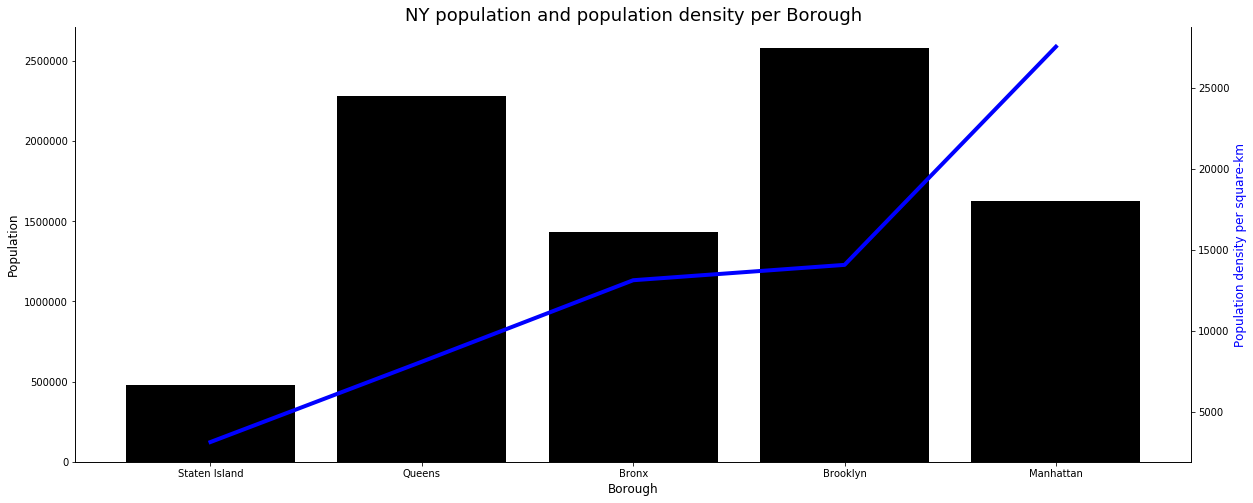

In [30]:
sorted_population = df_NY.sort_values(["Population_density"], ascending=True)

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'black'
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Population', color=color, fontsize=12)
ax1.bar(sorted_population["Borough"], sorted_population["Population_2018"], color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Population density per square-km', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(sorted_population["Borough"], sorted_population["Population_density"], color=color, linewidth=4)
#ax2.tick_params(axis='y', labelcolor=color)

# Title
ax1.set_title("NY population and population density per Borough", fontsize=18)

# Hide spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()
#fig.savefig("Population", format="jpg")

As seen in the above population chart, the five Boroughs of New York differ significantly in their total population as well as in population density per km²:

* Staten Island has the lowest total population and the lowest population density.
* Manhattan has the highest population density with an average total population.
* Bronx, Brooklyn and Queens have average population densities but high total population, especially Brooklyn and Queens.

#### Visualizing Data: income

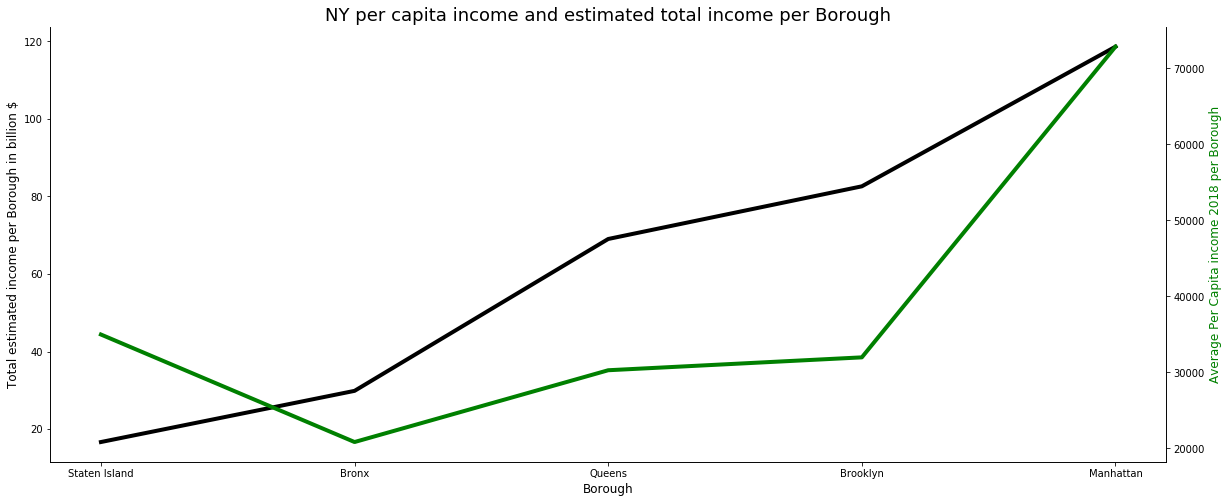

In [31]:
sorted_income = df_NY.sort_values(["Total estimated income per Borough"], ascending=True)
sorted_income["Total estimated income per Borough in billion $"] = sorted_income["Total estimated income per Borough"]/1000000000

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'black'
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Total estimated income per Borough in billion $', color=color, fontsize=12)
ax1.plot(sorted_income["Borough"], sorted_income["Total estimated income per Borough in billion $"], color=color, linewidth=4)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax2.set_ylabel('Average Per Capita income 2018 per Borough', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(sorted_income["Borough"], sorted_income["Average Per Capita income 2018 per Borough"], color=color, linewidth=4)
#ax2.tick_params(axis='y', labelcolor=color)

# Title
ax1.set_title("NY per capita income and estimated total income per Borough", fontsize=18)

# Hide spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()
#fig.savefig("income", format="jpg")

The above Chart shows that in most Boroughs in New York, the per capita income and the estimated total income in each Borough are correlated, except Staten Island. This means that in Staten Island the total income is relatively low and is shared by only a relatively small number or people. Staten Island has also the second highest per capita income in New York. In Manhattan people have the highest per capita incomes and its the Borough with the highest total purchase power in New York.

#### Visualizing Data: venues

In this section I will show the venues per capita and venues per km² in a bar chart as well as the distribution of the organic stores in maps.

##### Venues Chart

In [32]:
sorted_venues = df_map.groupby(["Borough"]).count

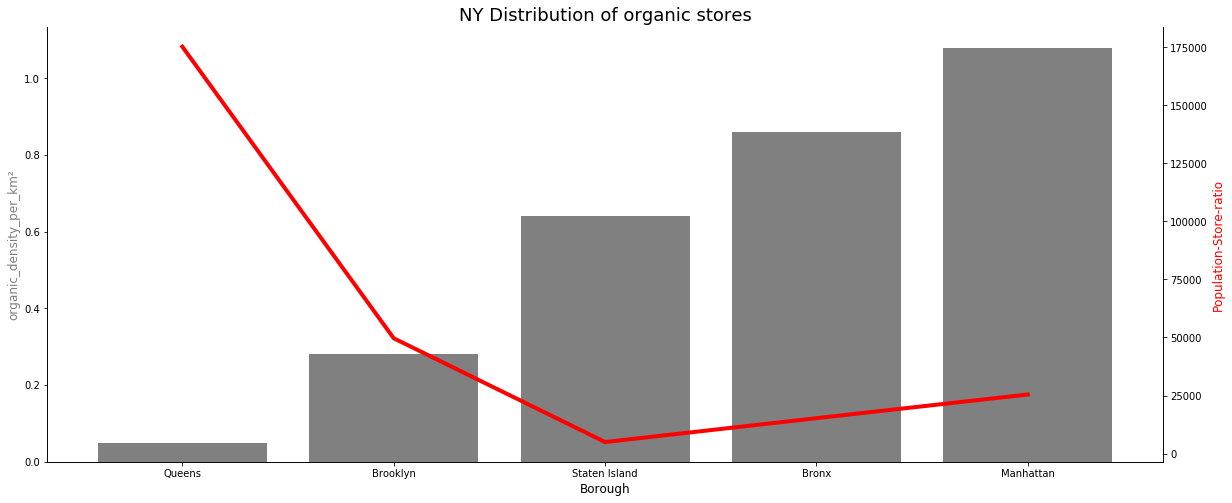

In [190]:
sorted_venues = df_map.sort_values(["organic_density_per_km²"], ascending=True)

fig, ax1 = plt.subplots(figsize=(20,8))

color = 'grey'
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('organic_density_per_km²', color=color, fontsize=12)
ax1.bar(sorted_venues["Borough"], sorted_venues["organic_density_per_km²"], color=color, linewidth=4)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Population-Store-ratio', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(sorted_venues["Borough"], sorted_venues["Population-Store-ratio"], color=color, linewidth=4)
#ax2.tick_params(axis='y', labelcolor=color)

# Title
ax1.set_title("NY Distribution of organic stores", fontsize=18)

# Hide spines
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()
#fig.savefig("Store_distribution", format="jpg")

In this Chart we see that the Boroughs differ in their distribution of organic stores. While in Queens there are just a few stores, in Manhattan there is a plethora of organic stores. On the other hand, in Queens there comes one organic store on about 175,000 people while in Manhattan one store comes for about 25,000 people.

##### Venues maps

In the following maps we see the distribution of existing oganic grocery stores in the Boroughs of New York. The second map shows merged Dataspots the visualize areas with high density of stores.

In [34]:
from folium import plugins

# New York latitude and longitude
latitude = 40.730610
longitude = -73.935242

In [35]:
# create map
NY_map = folium.Map(location=[latitude, longitude], zoom_start=9.4)

# instantiate a feature group for stores
organic_stores = folium.map.FeatureGroup()

# loop through stores
for lat, lng, label in zip(df_map.Venue_Lat, df_map.Venue_Long, df_map.Borough):
    organic_stores.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add stores to map
NY_map.add_child(organic_stores)

In [135]:
# plain map
NY_map = folium.Map(location = [latitude, longitude], zoom_start = 9.4)

# instantiate a mark cluster object for stores
organic = plugins.MarkerCluster().add_to(NY_map)

# loop through the dataframe
for lat, lng, label, in zip(df_map.Venue_Lat, df_map.Venue_Long, df_map.Borough):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(organic)

# display map
NY_map

### Step 4: K-Means Clustering

As the analyzes show, per capita income as well as the distribution of organic stores do differ in the Boroughs of New York. Therefore, for the next step of Clustering the Data it is helpful to create a new DataFrame with only the relevant Data. Information for Clustering are

* Average per Capita income
* density of stores per km²
* No of stores around 500 meters

To check how many Clusters do exist based on these information the elbow method is perfomed as step one. In step 2 a map is being generated to visualize the different Clusters.

#### Data preperation for Clustering

In [160]:
# Create new DataFrame
df_cluster = df_map_merged[["Borough", "Venue", "Venue_Lat", "Venue_Long", "Average Per Capita income 2018 per Borough",
                   "organic_density_per_km²", "no_venues_500"]]

In [150]:
df_cluster.head()

,Borough,Venue,Venue_Lat,Venue_Long,Average Per Capita income 2018 per Borough,organic_density_per_km²,no_venues_500
0,Staten Island,Whole Foods Market,40.631498,-74.304228,34987,0.64,0
1,Staten Island,Park Slope Food Coop,40.674759,-73.976794,34987,0.64,8
2,Bronx,Park Slope Food Coop,40.674759,-73.976794,20850,0.86,8
3,Brooklyn,Park Slope Food Coop,40.674759,-73.976794,31984,0.28,8
4,Staten Island,Flatbush Food Coop,40.641196,-73.964675,34987,0.64,5


In [139]:
# Import relevant packages
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import matplotlib.colors as colors

In [161]:
# Normalizing the variables which are considered for Clustering
from sklearn.preprocessing import StandardScaler
X = df_cluster.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.14868926, -0.24360143, -1.18313   ],
       [-0.14868926, -0.24360143,  1.39310529],
       [-0.91417539,  0.51791074,  1.39310529],
       [-0.31129483, -1.48971224,  1.39310529],
       [-0.14868926, -0.24360143,  0.42701706],
       [-0.91417539,  0.51791074,  0.42701706],
       [-0.31129483, -1.48971224,  0.42701706],
       [-0.14868926, -0.24360143, -0.53907118],
       [-0.91417539,  0.51791074, -0.53907118],
       [-0.31129483, -1.48971224, -0.53907118],
       [-0.14868926, -0.24360143, -0.53907118],
       [ 1.90053069,  1.2794229 , -0.53907118],
       [-0.91417539,  0.51791074, -0.53907118],
       [-0.14868926, -0.24360143,  2.35919352],
       [ 1.90053069,  1.2794229 ,  2.35919352],
       [-0.91417539,  0.51791074,  2.35919352],
       [-0.31129483, -1.48971224,  2.35919352],
       [-0.14868926, -0.24360143, -0.86110059],
       [-0.31129483, -1.48971224, -0.86110059],
       [-0.14868926, -0.24360143, -1.18313   ],
       [-0.14868926, -0.24360143, -0.539

#### Step 1: Determine Elbow-Point

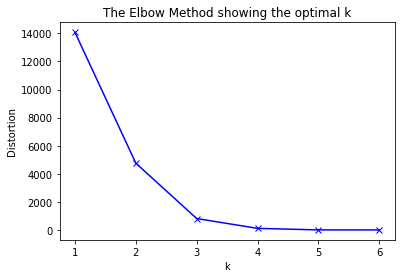

In [188]:
# create new plot and data
plt.plot()
X = X
colors_elbow = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#plt.savefig('Elbow_Point.jpg')

As this Chart shows, k = 3 fits best for the Data.

#### Step 2: Clustering

In [163]:
# Modelling
clusterNum = 3 #equals elbow point
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [173]:
# Assign Cluster to DataFrame
df_cluster["Clusterlabel"] = labels

C:\Users\Matthias\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
# Explore Cluster

df_cluster.groupby(["Clusterlabel"]).mean()

,Venue_Lat,Venue_Long,Average Per Capita income 2018 per Borough,organic_density_per_km²,no_venues_500
Clusterlabel,,,,,
0,40.700275,-73.991212,33637.745342,0.476087,3.583851
1,40.742578,-73.972031,72832.000000,1.080000,3.875000
2,40.769371,-73.934721,20850.000000,0.860000,3.691489


Based on this information we see 3 Clusters which can be described as follows:

* Cluster 0: middle income; low density of existing stores; low number of stores around 500 meters
* Cluster 1: high income; high density of existing stores; high number of stores around 500 meters
* Cluster 2: low income; relatively high density of existing stores; relatively high number of stores around 500 meters

As we seek for locations with high per capita income, low density of existing stores and low number of stores around 500 meters, two Clusters show good potential for opening new stores:

* Cluster 0 has the lowest density an number of stores around as well as a solid income-structure
* Cluster 1 has already an exising market for organic stores but shows a very high-income structure

To sum up, locations for new stores should be searched nearby stores of Clusters 0 and 1.

#### Print map with Clusters

In [169]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_cluster['Venue_Lat'], df_cluster['Venue_Long'], df_cluster['Clusterlabel']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## Results <a id="res"></a>

As shown in the previous analysis, New York organic stores can be clustered into 3 Cluster considering income structure, density of existing organic stores and number of organic stores around 500 meters of existing stores. 
For opening new organic stores, I would suggest to search for locations with high income structures and low density of organic stores. The analysis shows that this situation is best met in Cluster 0 and 1.

These two Clusters extend mainly over Staten Island, Brooklyn (red dots in map) and parts of Manhattan (purple dots in map). Considering the population in the Boroughs (see Chart: NY population and population density per Borough), Brooklyn with its high population seems to be the Borough with highest potentials for opening new organic based grocery stores.

## Discussion <a id="diss"></a>

To sum up, organic products are especially bought by people with relatively high incomes. Another factor is clearly the already existing market (saturated markets vs. potential markets). These factors were included in the above analysis and showed, that 3 clusters show up in New York. All of those Cluster do differ but two of them can be seen as potential Clusters. Cluster 0 has a low density of existing stores and a solid income structure while Cluster 1 has very high-income structure. Contrary, Cluster 2 has low income structures as well as relatively saturated markets and should not be preferred to open new stores.

## Conclusion <a id="conc"></a>

To conclude this report it is necessary to say that the above analysis is based on just a simple set of factors being considered. Factors like rentals, leases or even purchase prices for new stores are not considered. Also one could even go deeper into each Neighborhood or even streets. This analysis was meant to search for top-level suggestions and future analyzes should consider these recommandations. Nevertheless, this report gives a first impression of the structures of organic stores in the NY Boroughs in order to recommend deeper studies within this Borough or seek for possible Retail outlets.